# Notebook for generating plots in the draft 

In [1]:
import sys

# sys.path.insert(0, '/Users/akshayga/Library/CloudStorage/Dropbox/PAPERS/GD-QST_2024/GD-QST-Akshay/qst_tec')
# You have to change the path of the library 
import os

from qutip import * 
from itertools import *
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import qutip as qtp
from scipy.interpolate import interp1d
from matplotlib.font_manager import FontProperties
import matplotlib.cm as cm
from matplotlib.colors import Normalize



## Figure 2: Time complexity upto 7 qubits

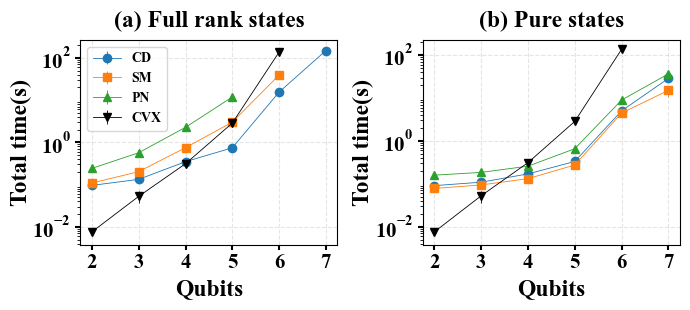

In [7]:
qubits, chol_time_avg, mani_time_avg, proj_time_avg, chol_time_std, mani_time_std, proj_time_std = [],[],[],[],[],[],[]

# Loop over ranks from 2 to 32 with step 2
for qubit in range(2, 6, 1):
    # Construct file name
    file_name = f'{qubit}q-random-state-time-pauli.npz'
    loaded_data = np.load(file_name)

    # Access the arrays
    iterations, mean_fid_chol_rank, std_fid_chol_rank, mean_time_chol_rank, std_time_chol_rank, \
    mean_fid_mani, std_fid_mani, mean_time_mani, std_time_mani, \
    mean_fid_proj, std_fid_proj, mean_time_proj, std_time_proj = \
    [loaded_data[key] for key in ['iterations', 'mean_fid_chol_rank', 'std_fid_chol_rank', 'mean_time_chol_rank', 'std_time_chol_rank', 
                                  'mean_fid_mani', 'std_fid_mani', 'mean_time_mani', 'std_time_mani', 
                                  'mean_fid_proj', 'std_fid_proj', 'mean_time_proj', 'std_time_proj']]

    # Find indices
    index_chol = next(i for i, v in enumerate(mean_fid_chol_rank) if v > 0.99)
    index_mani = next(i for i, v in enumerate(mean_fid_mani) if v > 0.99)
    index_proj = next(i for i, v in enumerate(mean_fid_proj) if v > 0.99)

    qubits.append(qubit)
    chol_time_avg.append(mean_time_chol_rank[index_chol])
    mani_time_avg.append(mean_time_mani[index_mani])
    proj_time_avg.append(mean_time_proj[index_proj])

    chol_time_std.append(std_time_chol_rank[index_chol])
    mani_time_std.append(std_time_mani[index_mani])
    proj_time_std.append(std_time_proj[index_proj])

###############################
# 6q only chol and mani
loaded_data = np.load('6q-random-state-time-pauli.npz')
iterations, mean_fid_chol_rank, std_fid_chol_rank, mean_time_chol_rank, std_time_chol_rank, \
    mean_fid_mani, std_fid_mani, mean_time_mani, std_time_mani = [loaded_data[key] for key in ['iterations', 'mean_fid_chol_rank', 'std_fid_chol_rank', 'mean_time_chol_rank', 'std_time_chol_rank', 
                                  'mean_fid_mani', 'std_fid_mani', 'mean_time_mani', 'std_time_mani']]
# Find indices
index_chol = next(i for i, v in enumerate(mean_fid_chol_rank) if v > 0.99)
index_mani = next(i for i, v in enumerate(mean_fid_mani) if v > 0.99)

chol_time_avg.append(mean_time_chol_rank[index_chol])
mani_time_avg.append(mean_time_mani[index_mani])
chol_time_std.append(std_time_chol_rank[index_chol])
mani_time_std.append(std_time_mani[index_mani])


# 7q only chol 
loaded_data = np.load('7q-random-state-time-pauli.npz')
iterations, mean_fid_chol_rank, std_fid_chol_rank, mean_time_chol_rank, std_time_chol_rank = [loaded_data[key] for key in ['iterations', 'mean_fid_chol_rank', 'std_fid_chol_rank', 'mean_time_chol_rank', 'std_time_chol_rank']]
# Find indices
index_chol = next(i for i, v in enumerate(mean_fid_chol_rank) if v > 0.99)
chol_time_avg.append(mean_time_chol_rank[index_chol])
chol_time_std.append(std_time_chol_rank[index_chol])
##################################

# CVX data

cvx_time_avg = [0.007626144091288248, 0.05288926760355631, 0.3123272577921549, 2.8569729646046955, 136.58007451693217]
cvx_time_std = [0.0013522491363443315, 0.016282294215828677, 0.046010264010887, 0.0464189965326544, 1.0458626983996884]


chol_fullrank_time_avg = chol_time_avg
mani_fullrank_time_avg = mani_time_avg
proj_fullrank_time_avg = proj_time_avg
cvx_fullrank_time_avg = cvx_time_avg

chol_fullrank_time_std = chol_time_std
mani_fullrank_time_std = mani_time_std
proj_fullrank_time_std = proj_time_std
cvx_fullrank_time_std = cvx_time_std


qubits = [2,3,4,5,6,7]

############################################# Pure state toography start

qubits, chol_time_avg, mani_time_avg, proj_time_avg, chol_time_std, mani_time_std, proj_time_std = [],[],[],[],[],[],[]

# data import for pure state tomography
for qubit in range(2, 8, 1):
    # Construct file name
    file_name = f'{qubit}q-pure-state-time-pauli.npz'
    loaded_data = np.load(file_name)

    # Access the arrays
    iterations, mean_fid_chol_rank, std_fid_chol_rank, mean_time_chol_rank, std_time_chol_rank, \
    mean_fid_mani, std_fid_mani, mean_time_mani, std_time_mani, \
    mean_fid_proj, std_fid_proj, mean_time_proj, std_time_proj = \
    [loaded_data[key] for key in ['iterations', 'mean_fid_chol_rank', 'std_fid_chol_rank', 'mean_time_chol_rank', 'std_time_chol_rank', 
                                  'mean_fid_mani', 'std_fid_mani', 'mean_time_mani', 'std_time_mani', 
                                  'mean_fid_proj', 'std_fid_proj', 'mean_time_proj', 'std_time_proj']]

    # Find indices
    index_chol = next(i for i, v in enumerate(mean_fid_chol_rank) if v > 0.99)
    index_mani = next(i for i, v in enumerate(mean_fid_mani) if v > 0.99)
    index_proj = next(i for i, v in enumerate(mean_fid_proj) if v > 0.99)

    qubits.append(qubit)
    chol_time_avg.append(mean_time_chol_rank[index_chol])
    mani_time_avg.append(mean_time_mani[index_mani])
    proj_time_avg.append(mean_time_proj[index_proj])

    chol_time_std.append(std_time_chol_rank[index_chol])
    mani_time_std.append(std_time_mani[index_mani])
    proj_time_std.append(std_time_proj[index_proj])


chol_pure_time_avg = chol_time_avg
mani_pure_time_avg = mani_time_avg
proj_pure_time_avg = proj_time_avg

chol_pure_time_std = chol_time_std
mani_pure_time_std = mani_time_std
proj_pure_time_std = proj_time_std

######### plotting starts 


# Define font properties for bold labels
bold_font = FontProperties(family='Times New Roman', weight='bold', size=15)

# Create a figure and axes for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3.2))  # Adjusted figsize to fit both plots

# Plotting on the first subplot (ax1)

ax1.errorbar(qubits, chol_fullrank_time_avg, yerr=chol_fullrank_time_std, label='CD', marker='o', linestyle='-',linewidth=0.6)
ax1.errorbar(qubits[:len(mani_fullrank_time_avg)], mani_fullrank_time_avg, yerr=mani_fullrank_time_std, label='SM', marker='s',linestyle='-',linewidth=0.6)
ax1.errorbar(qubits[:len(proj_fullrank_time_avg)], proj_fullrank_time_avg, yerr=proj_fullrank_time_std, label='PN', marker='^',linestyle='-',linewidth=0.6)
ax1.errorbar(qubits[:len(cvx_fullrank_time_avg)], cvx_fullrank_time_avg, yerr=cvx_fullrank_time_std, label='CVX', marker='v', color='black',linestyle='-',linewidth=0.6)

ax1.set_xlabel('Qubits', fontsize=17, fontweight='bold', fontname='Times New Roman')
ax1.set_ylabel('Total time(s)', fontsize=17, fontweight='bold', fontname='Times New Roman', labelpad=1)
ax1.set_xticks(np.arange(2, 8, 1))

ax1.set_yscale('log')

# Set specific y-ticks and corresponding labels
ax1.set_yticks([1e-2, 1e0, 1e2])
# ax1.set_yticklabels([r'$10^{-2}$', r'$10^{0}$', r'$10^{2}$'])


ax1.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)

for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontproperties(bold_font)

ax1.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 10})
ax1.grid(True, linestyle='--', color='gray', alpha=0.2)


# Plotting on the second subplot (ax2)

# ax2.set_title("(b) Pure state reconstruction", fontweight='bold', fontsize=11, fontname='Times New Roman')

ax2.errorbar(qubits, chol_pure_time_avg, yerr=chol_pure_time_std, label='CD', marker='o', linestyle='-',linewidth=0.6)
ax2.errorbar(qubits[:len(mani_pure_time_avg)], mani_pure_time_avg, yerr=chol_pure_time_std, label='SM', marker='s',linestyle='-',linewidth=0.6)
ax2.errorbar(qubits[:len(proj_pure_time_avg)], proj_pure_time_avg, yerr=chol_pure_time_std, label='PN', marker='^',linestyle='-',linewidth=0.6)
ax2.errorbar(qubits[:len(cvx_fullrank_time_avg)], cvx_fullrank_time_avg, yerr=cvx_fullrank_time_std, label='CVX', marker='v', color='black',linestyle='-',linewidth=0.6)


ax2.set_xlabel('Qubits', fontsize=17, fontweight='bold', fontname='Times New Roman')
ax2.set_ylabel('Total time(s)', fontsize=17, fontweight='bold', fontname='Times New Roman', labelpad=1)
ax2.set_xticks(np.arange(2, 8, 1))
# ax2.set_xticks(np.arange(2, 33, 2), minor=True)
ax2.set_yscale('log')
# Set specific y-ticks and corresponding labels
ax2.set_yticks([1e-2, 1e0, 1e2])

ax2.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)

for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontproperties(bold_font)

ax2.grid(True, linestyle='--', color='gray', alpha=0.2)


# Set titles for each subplot
ax1.set_title('(a) Full rank states', fontsize=17, fontweight='bold', fontname='Times New Roman', pad=10)
ax2.set_title('(b) Pure states', fontsize=17, fontweight='bold', fontname='Times New Roman', pad=10)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Figure 3: Time complexity for 5-qubit system, iteration vs fidelity and time vs fidelity

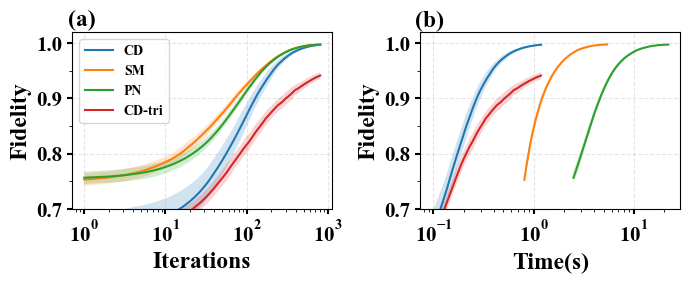

In [8]:
loaded_data = np.load('5q-random-state-time-pauli.npz')

# Accessing the arrays
iterations = loaded_data['iterations']

#Cholesky
mean_fid_chol_rank = loaded_data['mean_fid_chol_rank']
std_fid_chol_rank = loaded_data['std_fid_chol_rank']
mean_time_chol_rank = loaded_data['mean_time_chol_rank']
std_time_chol_rank = loaded_data['std_time_chol_rank']

#Cholesky_triangular
mean_fid_chol_triangular = loaded_data['mean_fid_chol_triangular']
std_fid_chol_triangular = loaded_data['std_fid_chol_triangular']
mean_time_chol_triangular = loaded_data['mean_time_chol_triangular']
std_time_chol_triangular = loaded_data['std_time_chol_triangular']

#Manifold
mean_fid_mani = loaded_data['mean_fid_mani']
std_fid_mani = loaded_data['std_fid_mani']
mean_time_mani = loaded_data['mean_time_mani']
std_time_mani = loaded_data['std_time_mani']


#Projection
mean_fid_proj = loaded_data['mean_fid_proj']
std_fid_proj = loaded_data['std_fid_proj']
mean_time_proj = loaded_data['mean_time_proj']
std_time_proj = loaded_data['std_time_proj']


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,3))

#fig.suptitle("Fidelity Analysis: Iterations vs Fidelity & Time vs Fidelity", fontsize=16)

###-------------Fidelity Vs iterations -------------#######

# ax1.set_title("5q, random states + full rank ansatz", fontsize=11)

ax1.plot(iterations, mean_fid_chol_rank,label="CD")
ax1.fill_between(iterations, mean_fid_chol_rank - std_fid_chol_rank, mean_fid_chol_rank + std_fid_chol_rank, alpha=0.2)

ax1.plot(iterations, mean_fid_mani, label="SM")
ax1.fill_between(iterations, mean_fid_mani - std_fid_mani, mean_fid_mani + std_fid_mani, alpha=0.2)

ax1.plot(iterations, mean_fid_proj, label="PN")
ax1.fill_between(iterations, mean_fid_proj - std_fid_proj, mean_fid_proj + std_fid_proj, alpha=0.2)

ax1.plot(iterations, mean_fid_chol_triangular, label="CD-tri")
ax1.fill_between(iterations, mean_fid_chol_triangular - std_fid_chol_triangular, mean_fid_chol_triangular + std_fid_chol_triangular, alpha=0.2)

#############
ax1.set_xlabel('Iterations', fontsize=17, fontweight='bold', fontname='Times New Roman')
ax1.set_ylabel('Fidelity', fontsize=17, fontweight='bold', fontname='Times New Roman')


# Set x-ticks with major and minor intervals
ax1.set_xticks(np.arange(0, 801, 200))  # Major ticks at intervals of 0.2
ax1.set_xticks(np.arange(0, 801, 100), minor=True)  # Minor ticks at intervals of 0.05


ax1.set_ylim(top=1.02)
ax1.set_ylim(bottom=0.7)
ax1.set_yticks([0.7, 0.8, 0.9, 1.0])
# Set minor ticks at 0.4 and 0.8
ax1.set_yticks([0.75, 0.85, 0.95], minor=True)

# Customize tick appearance
ax1.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)
    
# Set custom font for tick labels
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontproperties(bold_font)

ax1.set_xscale('log')


ax1.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 10})
ax1.grid(True, linestyle='--', color='gray', alpha=0.2)

###############


###-------------Fidelity Vs time -------------#######

# ax2.set_title("5q, random states + full rank ansatz", fontsize=10)

ax2.plot(mean_time_chol_rank, mean_fid_chol_rank,label="CD")
ax2.fill_between(mean_time_chol_rank, mean_fid_chol_rank - std_fid_chol_rank, mean_fid_chol_rank + std_fid_chol_rank, alpha=0.2)

ax2.plot(mean_time_mani, mean_fid_mani,label="SM")
ax2.fill_between(mean_time_mani, mean_fid_mani - std_fid_mani, mean_fid_mani + std_fid_mani, alpha=0.2)

ax2.plot(mean_time_proj, mean_fid_proj, label="PN")
ax2.fill_between(mean_time_proj, mean_fid_proj - std_fid_proj, mean_fid_proj + std_fid_proj, alpha=0.2)

ax2.plot(mean_time_chol_triangular, mean_fid_chol_triangular, label="CD_tri")
ax2.fill_between(mean_time_chol_triangular, mean_fid_chol_triangular - std_fid_chol_triangular, mean_fid_chol_triangular + std_fid_chol_triangular, alpha=0.2)


ax2.set_xlabel('Time(s)', fontsize=17, fontweight='bold', fontname='Times New Roman')
ax2.set_ylabel('Fidelity', fontsize=17, fontweight='bold', fontname='Times New Roman')



# Set x-ticks with major and minor intervals
ax2.set_xticks(np.arange(0, 24, 4))  # Major ticks at intervals of 0.2
ax2.set_xticks(np.arange(0, 24, 1), minor=True)  # Minor ticks at intervals of 0.05


ax2.set_ylim(top=1.02)
ax2.set_ylim(bottom=0.7)
ax2.set_yticks([0.7, 0.8, 0.9, 1.0])
# Set minor ticks at 0.4 and 0.8
ax2.set_yticks([0.75, 0.85, 0.95], minor=True)

# Customize tick appearance
ax2.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)
    
# Set custom font for tick labels
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontproperties(bold_font)

ax2.set_xscale('log')

# ax2.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 10})
ax2.grid(True, linestyle='--', color='gray', alpha=0.2)

# Add label subplot
ax1.text(0.09, 1.13, '(a)', transform=ax1.transAxes, fontsize=17, fontweight='bold', fontname='Times New Roman', va='top', ha='right')
ax2.text(0.09, 1.13, '(b)', transform=ax2.transAxes, fontsize=17, fontweight='bold', fontname='Times New Roman', va='top', ha='right')


# Adjust layout to avoid overlap
plt.tight_layout()


plt.show()


## Figure 4: GD-QST performance w.r.t. rank of state and ansatz for 5-qubit case

/var/folders/nc/4_n3hjx92zz0xnmsg8jnvf240000gn/T/ipykernel_22608/924937105.py:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.3, 1, 1])  # To avoid overlapping the third plot


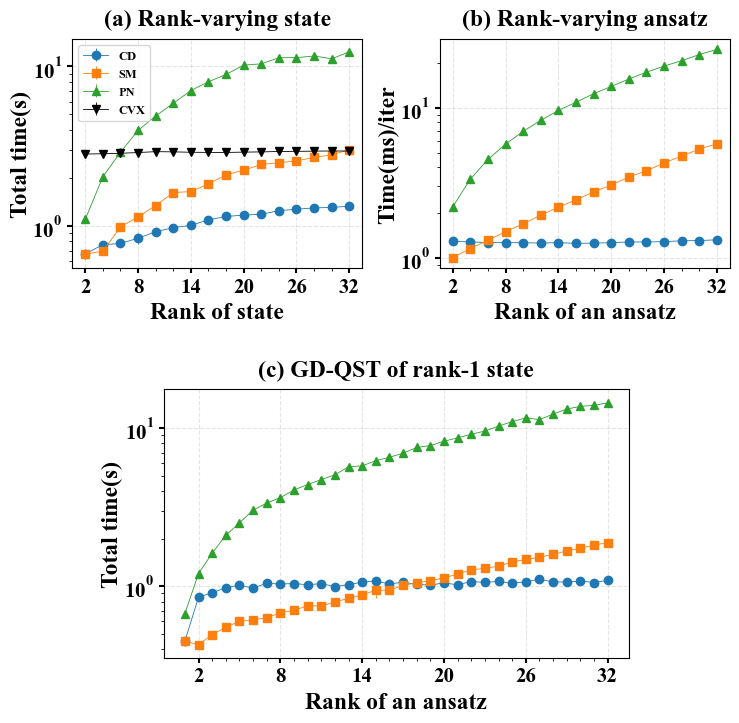

In [9]:
rank_values, chol_time_avg, mani_time_avg, proj_time_avg, chol_time_std, mani_time_std, proj_time_std = [],[],[],[],[],[],[]

# Loop over ranks from 2 to 32 with step 2
for rank in range(2, 34, 2):
    # Construct file name
    file_name = f'5q-rank-{rank}-time-pauli.npz'
    loaded_data = np.load(file_name)

    # Access the arrays
    iterations, mean_fid_chol_rank, std_fid_chol_rank, mean_time_chol_rank, std_time_chol_rank, \
    mean_fid_mani, std_fid_mani, mean_time_mani, std_time_mani, \
    mean_fid_proj, std_fid_proj, mean_time_proj, std_time_proj = \
    [loaded_data[key] for key in ['iterations', 'mean_fid_chol_rank', 'std_fid_chol_rank', 'mean_time_chol_rank', 'std_time_chol_rank', 
                                  'mean_fid_mani', 'std_fid_mani', 'mean_time_mani', 'std_time_mani', 
                                  'mean_fid_proj', 'std_fid_proj', 'mean_time_proj', 'std_time_proj']]

    # Find indices
    index_chol = next(i for i, v in enumerate(mean_fid_chol_rank) if v > 0.99)
    index_mani = next(i for i, v in enumerate(mean_fid_mani) if v > 0.99)
    index_proj = next(i for i, v in enumerate(mean_fid_proj) if v > 0.99)

    rank_values.append(rank)
    chol_time_avg.append(mean_time_chol_rank[index_chol])
    mani_time_avg.append(mean_time_mani[index_mani])
    proj_time_avg.append(mean_time_proj[index_proj])

    chol_time_std.append(std_time_chol_rank[index_chol])
    mani_time_std.append(std_time_mani[index_mani])
    proj_time_std.append(std_time_proj[index_proj])

chol_time_avg.sort()
# CVX data import
cvx_data = np.load('5q-rankwise-time-pauli-cvx.npz')
cvx_time_avg = cvx_data['avg_time_cvx']
cvx_time_std = cvx_data['std_time_cvx']


# Time per iteration data import
time_per_iter = np.load('time-per-iter.npz')

rank =  time_per_iter['rank']
avg_time_per_iter_chol = time_per_iter['avg_time_per_iter_chol']
avg_time_per_iter_mani = time_per_iter['avg_time_per_iter_mani']
avg_time_per_iter_proj = time_per_iter['avg_time_per_iter_proj']


# Load the data for chol, mani, and proj for 5q pure state with varying ansarz
data_chol_rank1 = np.load('5q-rank1-rank-vary-ansatz-chol.npz', allow_pickle=True)
data_mani_rank1 = np.load('5q-rank1-rank-vary-ansatz-mani.npz', allow_pickle=True)
data_proj_rank1 = np.load('5q-rank1-rank-vary-ansatz-proj.npz', allow_pickle=True)

# Extract the necessary variables from each dataset (chol, mani, proj)
def extract_data(data):
    average_fid_by_rank = data['average_fid_by_rank'].item()
    average_time_by_rank = data['average_time_by_rank'].item()
    std_fid_by_rank = data['std_fid_by_rank'].item()
    std_time_by_rank = data['std_time_by_rank'].item()
    return average_fid_by_rank, average_time_by_rank, std_fid_by_rank, std_time_by_rank

average_fid_by_rank_chol, average_time_by_rank_chol, std_fid_by_rank_chol, std_time_by_rank_chol = extract_data(data_chol_rank1)
average_fid_by_rank_mani, average_time_by_rank_mani, std_fid_by_rank_mani, std_time_by_rank_mani = extract_data(data_mani_rank1)
average_fid_by_rank_proj, average_time_by_rank_proj, std_fid_by_rank_proj, std_time_by_rank_proj = extract_data(data_proj_rank1)

# Define ranks
# ranks = [10, 12, 14, 16, 18, 20]
ranks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]

# Function to compute time_rank_vary_ansatz and the corresponding standard deviations
def compute_time_and_std(average_fid_by_rank, average_time_by_rank, std_time_by_rank):
    time_rank_vary_ansatz = []
    std_rank_vary_ansatz = []
    for rank in ranks:
        index = np.argmax(average_fid_by_rank[rank] > 0.99)
        time_rank_vary_ansatz.append(average_time_by_rank[rank][index])
        std_rank_vary_ansatz.append(std_time_by_rank[rank][index])
    return time_rank_vary_ansatz, std_rank_vary_ansatz

# Compute time and std for chol, mani, and proj
time_rank_vary_ansatz_chol_rank1, std_rank_vary_ansatz_chol_rank1 = compute_time_and_std(average_fid_by_rank_chol, average_time_by_rank_chol, std_time_by_rank_chol)
time_rank_vary_ansatz_mani_rank1, std_rank_vary_ansatz_mani_rank1 = compute_time_and_std(average_fid_by_rank_mani, average_time_by_rank_mani, std_time_by_rank_mani)
time_rank_vary_ansatz_proj_rank1, std_rank_vary_ansatz_proj_rank1 = compute_time_and_std(average_fid_by_rank_proj, average_time_by_rank_proj, std_time_by_rank_proj)


# Create a figure and specify the size
fig = plt.figure(figsize=(7.5, 8.4))

# # First row: Two plots (left and right)
ax1 = plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st position
ax2 = plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd position


# Plotting on the first subplot (ax1)
ax1.errorbar(rank_values, chol_time_avg, yerr=chol_time_std, label='CD', marker='o',linestyle='-',linewidth=0.6)
ax1.errorbar(rank_values, mani_time_avg, yerr=mani_time_std, label='SM', marker='s',linestyle='-',linewidth=0.6)
ax1.errorbar(rank_values, proj_time_avg, yerr=proj_time_std, label='PN', marker='^',linestyle='-',linewidth=0.6)
ax1.errorbar(rank_values, cvx_time_avg, yerr=cvx_time_std, label='CVX', color='black', marker='v',linestyle='-',linewidth=0.6)

ax1.set_xlabel('Rank of state', fontsize=17, fontweight='bold', fontname='Times New Roman')
ax1.set_ylabel('Total time(s)', fontsize=17, fontweight='bold', fontname='Times New Roman',labelpad=1)

ax1.set_xticks(np.arange(2, 33, 6))
ax1.set_xticks(np.arange(2, 33, 2), minor=True)
ax1.set_yscale('log')

ax1.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontproperties(bold_font)
ax1.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 9})
ax1.grid(True, linestyle='--', color='gray', alpha=0.2)

# Plotting on the second subplot (ax2)
ax2.plot(rank, avg_time_per_iter_chol*1000, label='CD', marker='o',linestyle='-',linewidth=0.6)
ax2.plot(rank, avg_time_per_iter_mani*1000, label='SM', marker='s',linestyle='-',linewidth=0.6)
ax2.plot(rank, avg_time_per_iter_proj*1000, label='PN', marker='^',linestyle='-',linewidth=0.6)

ax2.set_xlabel('Rank of an ansatz', fontsize=17, fontweight='bold', fontname='Times New Roman')
ax2.set_ylabel('Time(ms)/iter', fontsize=17, fontweight='bold', fontname='Times New Roman', labelpad=1)
ax2.set_xticks(np.arange(2, 33, 6))
ax2.set_xticks(np.arange(2, 33, 2), minor=True)
ax2.set_yscale('log')

ax2.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontproperties(bold_font)
    
# ax2.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 9})
ax2.grid(True, linestyle='--', color='gray', alpha=0.2)



############ ax4 begins

ax4 = fig.add_axes([0.225, 0.21, 0.62, 0.32], aspect='auto')  # The size is set manually to (4, 3)


ax4.errorbar(ranks, time_rank_vary_ansatz_chol_rank1, yerr=std_rank_vary_ansatz_chol_rank1, marker='o', linestyle='-', label='CD', linewidth=0.6)
ax4.errorbar(ranks, time_rank_vary_ansatz_mani_rank1, yerr=std_rank_vary_ansatz_mani_rank1, marker='s', linestyle='-', label='SM', linewidth=0.6)
ax4.errorbar(ranks, time_rank_vary_ansatz_proj_rank1, yerr=std_rank_vary_ansatz_proj_rank1, marker='^', linestyle='-', label='PN', linewidth=0.6)

ax4.set_xlabel('Rank of an ansatz', fontsize=17, fontweight='bold', fontname='Times New Roman')
ax4.set_ylabel('Total time(s)', fontsize=17, fontweight='bold', fontname='Times New Roman',labelpad=1)
ax4.set_xticks(np.arange(2, 33, 6))
ax4.set_xticks(np.arange(2, 33, 1), minor=True)


ax4.set_yscale('log')


ax4.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)
for label in ax4.get_xticklabels() + ax4.get_yticklabels():
    label.set_fontproperties(bold_font)
# ax3.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 8}, loc='upper left')
ax4.grid(True, linestyle='--', color='gray', alpha=0.2)


# Set titles for each subplot
ax4.set_title('(c) GD-QST of rank-1 state', fontsize=17, fontweight='bold', fontname='Times New Roman', pad=10)
ax1.set_title('(a) Rank-varying state', fontsize=17, fontweight='bold', fontname='Times New Roman', pad=10)
ax2.set_title('(b) Rank-varying ansatz', fontsize=17, fontweight='bold', fontname='Times New Roman', pad=10)

# Adjust layout for the first two plots
plt.tight_layout(rect=[0, 0.3, 1, 1])  # To avoid overlapping the third plot

# Show the plot
plt.show()

# Figure 5: GD-QST of Hadmard and GHZ state with reduced data sets

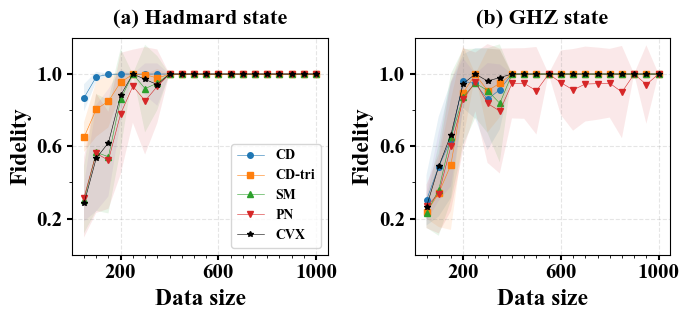

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load first data file
file_name_1 = '5q-hadmard-state-data-size-vary.npz'
loaded_data_1 = np.load(file_name_1)

# Extract data arrays from the first loaded file
number_of_ops_1, Favg_list_cvx_1, Favg_list_chol_rank_1, Favg_list_chol_triangular_1, Favg_list_mani_1, Favg_list_proj_1, Fstd_list_cvx_1, Fstd_list_chol_rank_1, Fstd_list_chol_triangular_1, Fstd_list_mani_1, Fstd_list_proj_1 \
      = [loaded_data_1[key] for key in ['number_of_ops', 'Favg_list_cvx', 'Favg_list_chol_rank', 'Favg_list_chol_triangular', 'Favg_list_mani', 'Favg_list_proj', 'Fstd_list_cvx', 'Fstd_list_chol_rank', 'Fstd_list_chol_triangular', 'Fstd_list_mani', 'Fstd_list_proj']]

# Load second data file
file_name_2 = '5q-GHZ-data-size-vary.npz'
loaded_data_2 = np.load(file_name_2)

# Extract data arrays from the second loaded file
number_of_ops_2, Favg_list_cvx_2, Favg_list_chol_rank_2, Favg_list_chol_triangular_2, Favg_list_mani_2, Favg_list_proj_2, Fstd_list_cvx_2, Fstd_list_chol_rank_2, Fstd_list_chol_triangular_2, Fstd_list_mani_2, Fstd_list_proj_2 \
      = [loaded_data_2[key] for key in ['number_of_ops', 'Favg_list_cvx', 'Favg_list_chol_rank', 'Favg_list_chol_triangular', 'Favg_list_mani', 'Favg_list_proj', 'Fstd_list_cvx', 'Fstd_list_chol_rank', 'Fstd_list_chol_triangular', 'Fstd_list_mani', 'Fstd_list_proj']]



# Define font properties for bold labels
bold_font = FontProperties(family='Times New Roman', weight='bold', size=15)

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3.3))

# Data and labels for plotting
# Plotting for Hadamard State data on ax1
ax1.plot(number_of_ops_1, Favg_list_chol_rank_1, label='CD', marker='o', markersize=4, linestyle='-', linewidth=0.4)
ax1.fill_between(number_of_ops_1, Favg_list_chol_rank_1 - Fstd_list_chol_rank_1, Favg_list_chol_rank_1 + Fstd_list_chol_rank_1, alpha=0.1)

ax1.plot(number_of_ops_1, Favg_list_chol_triangular_1, label='CD-tri', marker='s', markersize=4, linestyle='-', linewidth=0.4)
ax1.fill_between(number_of_ops_1, Favg_list_chol_triangular_1 - Fstd_list_chol_triangular_1, Favg_list_chol_triangular_1 + Fstd_list_chol_triangular_1, alpha=0.12)

ax1.plot(number_of_ops_1, Favg_list_mani_1, label='SM', marker='^', markersize=4, linestyle='-', linewidth=0.4)
ax1.fill_between(number_of_ops_1, Favg_list_mani_1 - Fstd_list_mani_1, Favg_list_mani_1 + Fstd_list_mani_1, alpha=0.1)

ax1.plot(number_of_ops_1, Favg_list_proj_1, label='PN', marker='v', markersize=4, linestyle='-', linewidth=0.4)
ax1.fill_between(number_of_ops_1, Favg_list_proj_1 - Fstd_list_proj_1, Favg_list_proj_1 + Fstd_list_proj_1, alpha=0.1)

ax1.plot(number_of_ops_1, Favg_list_cvx_1, label='CVX', marker='*', markersize=4, linestyle='-', linewidth=0.4, color='black')
ax1.fill_between(number_of_ops_1, Favg_list_cvx_1 - Fstd_list_cvx_1, Favg_list_cvx_1 + Fstd_list_cvx_1, alpha=0.1)

# Labels and title for Hadamard State
ax1.set_xlabel('Data size', fontsize=17, fontweight='bold', fontname='Times New Roman')
ax1.set_ylabel('Fidelity', fontsize=17, fontweight='bold', fontname='Times New Roman')
ax1.set_ylim(0.0, 1.2)
ax1.set_xticks(np.arange(200, 1050, 400))
ax1.set_xticks(np.arange(50, 1050, 50), minor=True)
ax1.set_yticks([0.2, 0.6, 1.0])
ax1.set_yticks([0.4, 0.8], minor=True)
ax1.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontproperties(bold_font)
ax1.grid(True, linestyle='--', color='gray', alpha=0.2)
ax1.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 10})
# ax1.set_xscale('log')
# ax1.text(0.09, 1.15, '(a)', transform=ax1.transAxes, fontsize=17, fontweight='bold', fontname='Times New Roman', va='top', ha='right')


# Plotting for GHZ State data on ax2
ax2.plot(number_of_ops_2, Favg_list_chol_rank_2, label='CD', marker='o', markersize=4, linestyle='-', linewidth=0.4)
ax2.fill_between(number_of_ops_2, Favg_list_chol_rank_2 - Fstd_list_chol_rank_2, Favg_list_chol_rank_2 + Fstd_list_chol_rank_2, alpha=0.1)

ax2.plot(number_of_ops_2, Favg_list_chol_triangular_2, label='CD-tri', marker='s', markersize=4, linestyle='-', linewidth=0.4)
ax2.fill_between(number_of_ops_2, Favg_list_chol_triangular_2 - Fstd_list_chol_triangular_2, Favg_list_chol_triangular_2 + Fstd_list_chol_triangular_2, alpha=0.1)

ax2.plot(number_of_ops_2, Favg_list_mani_2, label='SM', marker='^', markersize=4, linestyle='-', linewidth=0.4)
ax2.fill_between(number_of_ops_2, Favg_list_mani_2 - Fstd_list_mani_2, Favg_list_mani_2 + Fstd_list_mani_2, alpha=0.1)

ax2.plot(number_of_ops_2, Favg_list_proj_2, label='PN', marker='v', markersize=4, linestyle='-', linewidth=0.4)
ax2.fill_between(number_of_ops_2, Favg_list_proj_2 - Fstd_list_proj_2, Favg_list_proj_2 + Fstd_list_proj_2, alpha=0.1)

ax2.plot(number_of_ops_2, Favg_list_cvx_2, label='CVX', marker='*', markersize=4, linestyle='-', linewidth=0.4, color='black')
ax2.fill_between(number_of_ops_2, Favg_list_cvx_2 - Fstd_list_cvx_2, Favg_list_cvx_2 + Fstd_list_cvx_2, alpha=0.1)

# Labels and title for GHZ State
ax2.set_xlabel('Data size', fontsize=17, fontweight='bold', fontname='Times New Roman')
ax2.set_ylabel('Fidelity', fontsize=17, fontweight='bold', fontname='Times New Roman')
ax2.set_ylim(0.0, 1.2)
ax2.set_xticks(np.arange(200, 1050, 400))
ax2.set_xticks(np.arange(50, 1050, 50), minor=True)
ax2.set_yticks([0.2, 0.6, 1.0])
ax2.set_yticks([0.4, 0.8], minor=True)
ax2.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontproperties(bold_font)
ax2.grid(True, linestyle='--', color='gray', alpha=0.2)
# ax2.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 10})
# ax2.set_xscale('log')
# ax2.text(0.09, 1.15, '(b)', transform=ax2.transAxes, fontsize=17, fontweight='bold', fontname='Times New Roman', va='top', ha='right')


# Set titles for each subplot
ax1.set_title('(a) Hadmard state', fontsize=16, fontweight='bold', fontname='Times New Roman', pad=10)
ax2.set_title('(b) GHZ state', fontsize=16, fontweight='bold', fontname='Times New Roman', pad=10)

# Adjust layout and save the figure
plt.tight_layout()

plt.show()


## Figure 6: GD-QST under depolarizing and Gaussian noise

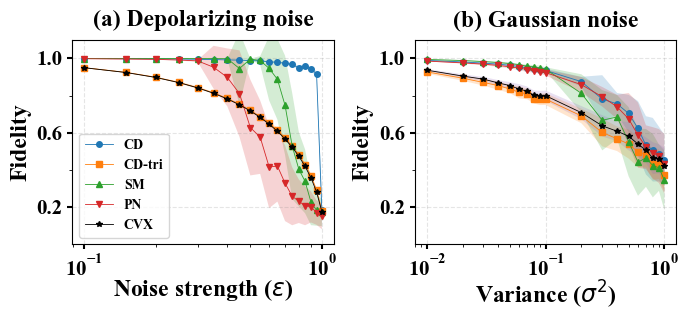

In [11]:

def load_data(noise_values, noise_type):
    mean_fid_chol_rank, std_fid_chol_rank = [], []
    mean_fid_chol_triangular, std_fid_chol_triangular = [], []
    mean_fid_mani, std_fid_mani = [], []
    mean_fid_proj, std_fid_proj = [], []
    mean_fid_cvx, std_fid_cvx = [], []

    # Data import for pure state tomography
    for value in noise_values:
        value_rounded = round(value, 2)
        # Construct file name
        file_name = f'5q-pure-{noise_type}-noise-{value_rounded}-pauli.npz'
        loaded_data = np.load(file_name)

        # Extract data arrays from the loaded file
        mean_fid_chol_rank.append(np.max(loaded_data['mean_fid_chol_rank']))
        std_fid_chol_rank.append(loaded_data['std_fid_chol_rank'][np.argmax(loaded_data['mean_fid_chol_rank'])])
        
        mean_fid_chol_triangular.append(np.max(loaded_data['mean_fid_chol_triangular']))
        std_fid_chol_triangular.append(loaded_data['std_fid_chol_triangular'][np.argmax(loaded_data['mean_fid_chol_triangular'])])
        
        mean_fid_mani.append(np.max(loaded_data['mean_fid_mani']))
        std_fid_mani.append(loaded_data['std_fid_mani'][np.argmax(loaded_data['mean_fid_mani'])])
        
        mean_fid_proj.append(np.max(loaded_data['mean_fid_proj']))
        std_fid_proj.append(loaded_data['std_fid_proj'][np.argmax(loaded_data['mean_fid_proj'])])
        
        mean_fid_cvx.append(np.max(loaded_data['mean_fid_cvx']))
        std_fid_cvx.append(loaded_data['std_fid_cvx'])

    return (np.array(mean_fid_chol_rank), np.array(std_fid_chol_rank),
            np.array(mean_fid_chol_triangular), np.array(std_fid_chol_triangular),
            np.array(mean_fid_mani), np.array(std_fid_mani),
            np.array(mean_fid_proj), np.array(std_fid_proj),
            np.array(mean_fid_cvx), np.array(std_fid_cvx))

# Noise configurations
depo_noise = np.arange(0.1, 1.05, 0.05)
gaussian_noise = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Load data
depo_data = load_data(depo_noise, 'depo')
gaussian_data = load_data(gaussian_noise, 'gaussian')

# Unpack data
(chol_rank_mean_fid_depo, chol_rank_std_fid_depo,
 chol_triangular_mean_fid_depo, chol_triangular_std_fid_depo,
 mani_mean_fid_depo, mani_std_fid_depo,
 proj_mean_fid_depo, proj_std_fid_depo,
 cvx_mean_fid_depo, cvx_std_fid_depo) = depo_data

(chol_rank_mean_fid_gaussian, chol_rank_std_fid_gaussian,
 chol_triangular_mean_fid_gaussian, chol_triangular_std_fid_gaussian,
 mani_mean_fid_gaussian, mani_std_fid_gaussian,
 proj_mean_fid_gaussian, proj_std_fid_gaussian,
 cvx_mean_fid_gaussian, cvx_std_fid_gaussian) = gaussian_data


##### Plotting starts
# Define font properties for bold labels
bold_font = FontProperties(family='Times New Roman', weight='bold', size=15)

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3.3))

# Depolarizing Noise
ax1.plot(depo_noise, chol_rank_mean_fid_depo, label='CD', marker='o', markersize=4, linestyle='-', linewidth=0.6)
ax1.fill_between(depo_noise, chol_rank_mean_fid_depo - chol_rank_std_fid_depo, chol_rank_mean_fid_depo + chol_rank_std_fid_depo, alpha=0.2)

ax1.plot(depo_noise, chol_triangular_mean_fid_depo, label='CD-tri', marker='s', markersize=4, linestyle='-', linewidth=0.6)
ax1.fill_between(depo_noise, chol_triangular_mean_fid_depo - chol_triangular_std_fid_depo, chol_triangular_mean_fid_depo + chol_triangular_std_fid_depo, alpha=0.2)

ax1.plot(depo_noise, mani_mean_fid_depo, label='SM', marker='^', markersize=4, linestyle='-', linewidth=0.6)
ax1.fill_between(depo_noise, mani_mean_fid_depo - mani_std_fid_depo, mani_mean_fid_depo + mani_std_fid_depo, alpha=0.2)

ax1.plot(depo_noise, proj_mean_fid_depo, label='PN', marker='v', markersize=4, linestyle='-', linewidth=0.6)
ax1.fill_between(depo_noise, proj_mean_fid_depo - proj_std_fid_depo, proj_mean_fid_depo + proj_std_fid_depo, alpha=0.2)

ax1.plot(depo_noise, cvx_mean_fid_depo, label='CVX', marker='*', markersize=4, linestyle='-', color='black', linewidth=0.6)
ax1.fill_between(depo_noise, cvx_mean_fid_depo - cvx_std_fid_depo, cvx_mean_fid_depo + cvx_std_fid_depo, alpha=0.2)

# Labels and title for Depolarizing Noise
ax1.set_xlabel(r'Noise strength ($\varepsilon$)', fontsize=17, fontweight='bold', fontname='Times New Roman', labelpad=-2)
ax1.set_ylabel('Fidelity', fontsize=17, fontweight='bold', fontname='Times New Roman')

# ax1.tick_params(axis='both', labelsize=10.5, labelweight='bold', labelcolor='black')

ax1.set_ylim(top=1.1)
ax1.set_ylim(bottom=0.0)
    
# Set x-ticks with major and minor intervals
ax1.set_xticks(np.arange(0.1, 1.1, 0.2))  # Major ticks at intervals of 0.2
ax1.set_xticks(np.arange(0.1, 1.1, 0.05), minor=True)  # Minor ticks at intervals of 0.05

ax1.set_yticks([0.2, 0.6, 1.0])
# Set minor ticks at 0.4 and 0.8
ax1.set_yticks([0.4, 0.8], minor=True)

# Customize tick appearance
ax1.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)
    
# Set custom font for tick labels
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontproperties(bold_font)

ax1.set_xscale('log')

ax1.grid(True, linestyle='--', color='gray', alpha=0.2)
ax1.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 10})

# Gaussian Noise
ax2.plot(gaussian_noise, chol_rank_mean_fid_gaussian, label='CD', marker='o', markersize=4, linestyle='-', linewidth=0.6)
ax2.fill_between(gaussian_noise, chol_rank_mean_fid_gaussian - chol_rank_std_fid_gaussian, chol_rank_mean_fid_gaussian + chol_rank_std_fid_gaussian, alpha=0.2)

ax2.plot(gaussian_noise, chol_triangular_mean_fid_gaussian, label='CD-tri', marker='s', markersize=4, linestyle='-', linewidth=0.6)
ax2.fill_between(gaussian_noise, chol_triangular_mean_fid_gaussian - chol_triangular_std_fid_gaussian, chol_triangular_mean_fid_gaussian + chol_triangular_std_fid_gaussian, alpha=0.2)

ax2.plot(gaussian_noise, mani_mean_fid_gaussian, label='SM', marker='^', markersize=4, linestyle='-', linewidth=0.6)
ax2.fill_between(gaussian_noise, mani_mean_fid_gaussian - mani_std_fid_gaussian, mani_mean_fid_gaussian + mani_std_fid_gaussian, alpha=0.2)

ax2.plot(gaussian_noise, proj_mean_fid_gaussian, label='PN', marker='v', markersize=4, linestyle='-', linewidth=0.6)
ax2.fill_between(gaussian_noise, proj_mean_fid_gaussian - proj_std_fid_gaussian, proj_mean_fid_gaussian + proj_std_fid_gaussian, alpha=0.2)

ax2.plot(gaussian_noise, cvx_mean_fid_gaussian, label='CVX', marker='*', markersize=4, linestyle='-', color='black', linewidth=0.6)
ax2.fill_between(gaussian_noise, cvx_mean_fid_gaussian - cvx_std_fid_gaussian, cvx_mean_fid_gaussian + cvx_std_fid_gaussian, alpha=0.2)

# Labels and title for Gaussian Noise
ax2.set_xlabel(r'Variance ($\sigma^2$)', fontsize=17, fontweight='bold', fontname='Times New Roman', labelpad=-2)
ax2.set_ylabel('Fidelity', fontsize=17, fontweight='bold', fontname='Times New Roman')
# ax2.tick_params(axis='both', labelsize=10.5, labelweight='bold', labelcolor='black')

ax2.set_ylim(top=1.1)
ax2.set_ylim(bottom=0.0)

ax2.set_yticks([0.2, 0.6, 1.0])
# Set minor ticks at 0.4 and 0.8
ax2.set_yticks([0.4, 0.8], minor=True)

# Customize tick appearance
ax2.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)
    
# Set custom font for tick labels
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontproperties(bold_font)

ax2.set_xscale('log')

ax2.grid(True, linestyle='--', color='gray', alpha=0.2)
# ax2.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 10})


# # Set titles for each subplot
ax1.set_title('(a) Depolarizing noise', fontsize=17, fontweight='bold', fontname='Times New Roman', pad=10)
ax2.set_title('(b) Gaussian noise', fontsize=17, fontweight='bold', fontname='Times New Roman', pad=10)

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


## FIgure 7: GD-QST of cat state (CV system)

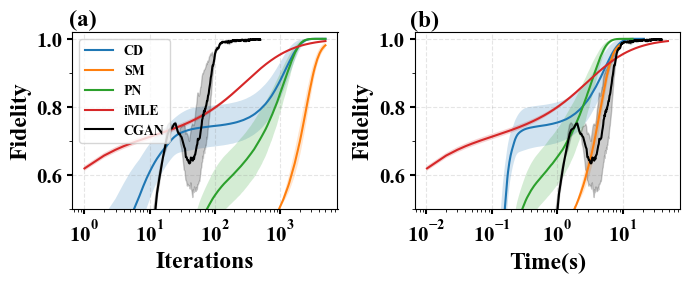

In [12]:
loaded_data = np.load('CV-cat-pure-states-alpha-2-time.npz')

# Accessing the arrays
iterations = loaded_data['iterations']
# iteration_cgan = loaded_data['iteration_cgan']
#Cholesky
mean_fid_chol_rank = loaded_data['mean_fid_chol_rank']
std_fid_chol_rank = loaded_data['std_fid_chol_rank']
mean_time_chol_rank = loaded_data['mean_time_chol_rank']
std_time_chol_rank = loaded_data['std_time_chol_rank']

#Manifold
mean_fid_mani = loaded_data['mean_fid_mani']
std_fid_mani = loaded_data['std_fid_mani']
mean_time_mani = loaded_data['mean_time_mani']
std_time_mani = loaded_data['std_time_mani']


#Projection
mean_fid_proj = loaded_data['mean_fid_proj']
std_fid_proj = loaded_data['std_fid_proj']
mean_time_proj = loaded_data['mean_time_proj']
std_time_proj = loaded_data['std_time_proj']


#iMLE
mean_fid_mle = loaded_data['mean_fid_mle']
std_fid_mle = loaded_data['std_fid_mle']
mean_time_mle = loaded_data['mean_time_mle']
std_time_mle = loaded_data['std_time_mle']


#CGAN
mean_fid_cgan = loaded_data['mean_fid_cgan']
std_fid_cgan = loaded_data['std_fid_cgan']
mean_time_cgan = loaded_data['mean_time_cgan']
std_time_cgan = loaded_data['std_time_cgan']


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,3))

###-------------Fidelity Vs iterations -------------#######

# ax1.set_title("5q, random states + full rank ansatz", fontsize=11)

ax1.plot(iterations, mean_fid_chol_rank,label="CD")
ax1.fill_between(iterations, mean_fid_chol_rank - std_fid_chol_rank, mean_fid_chol_rank + std_fid_chol_rank, alpha=0.2)

ax1.plot(iterations, mean_fid_mani, label="SM")
ax1.fill_between(iterations, mean_fid_mani - std_fid_mani, mean_fid_mani + std_fid_mani, alpha=0.2)

ax1.plot(iterations, mean_fid_proj, label="PN")
ax1.fill_between(iterations, mean_fid_proj - std_fid_proj, mean_fid_proj + std_fid_proj, alpha=0.2)

ax1.plot(iterations, mean_fid_mle, label="iMLE")
ax1.fill_between(iterations, mean_fid_mle - std_fid_mle, mean_fid_mle + std_fid_mle, alpha=0.2)

ax1.plot(np.arange(1,len(mean_fid_cgan)+1), mean_fid_cgan, label="CGAN", color='black')
ax1.fill_between(np.arange(1,len(mean_fid_cgan)+1), mean_fid_cgan - std_fid_cgan, mean_fid_cgan + std_fid_cgan, color='black', alpha=0.2)


#############
ax1.set_xlabel('Iterations', fontsize=17, fontweight='bold', fontname='Times New Roman')
ax1.set_ylabel('Fidelity', fontsize=17, fontweight='bold', fontname='Times New Roman')


ax1.set_ylim(top=1.02)
ax1.set_ylim(bottom=0.5)
ax1.set_yticks([0.6, 0.8, 1.0])
# Set minor ticks at 0.4 and 0.8
ax1.set_yticks([0.5, 0.7, 0.9], minor=True)

# Customize tick appearance
ax1.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)
    
# Set custom font for tick labels
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontproperties(bold_font)

ax1.set_xscale('log')

ax1.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 10})
ax1.grid(True, linestyle='--', color='gray', alpha=0.2)

###############


###-------------Fidelity Vs time -------------#######

# ax2.set_title("5q, random states + full rank ansatz", fontsize=10)

ax2.plot(mean_time_chol_rank, mean_fid_chol_rank,label="CD")
ax2.fill_between(mean_time_chol_rank, mean_fid_chol_rank - std_fid_chol_rank, mean_fid_chol_rank + std_fid_chol_rank, alpha=0.2)

ax2.plot(mean_time_mani, mean_fid_mani,label="SM")
ax2.fill_between(mean_time_mani, mean_fid_mani - std_fid_mani, mean_fid_mani + std_fid_mani, alpha=0.2)

ax2.plot(mean_time_proj, mean_fid_proj, label="PN")
ax2.fill_between(mean_time_proj, mean_fid_proj - std_fid_proj, mean_fid_proj + std_fid_proj, alpha=0.2)

ax2.plot(mean_time_mle, mean_fid_mle, label="iMLE")
ax2.fill_between(mean_time_mle, mean_fid_mle - std_fid_mle, mean_fid_mle + std_fid_mle, alpha=0.2)

ax2.plot(mean_time_cgan, mean_fid_cgan, label="CGAN", color='black')
ax2.fill_between(mean_time_cgan, mean_fid_cgan - std_fid_cgan, mean_fid_cgan + std_fid_cgan, color='black', alpha=0.2)


ax2.set_xlabel('Time(s)', fontsize=17, fontweight='bold', fontname='Times New Roman')
ax2.set_ylabel('Fidelity', fontsize=17, fontweight='bold', fontname='Times New Roman')


ax2.set_xscale('log')

ax2.set_ylim(top=1.02)
ax2.set_ylim(bottom=0.5)
ax2.set_yticks([0.6, 0.8, 1.0])

ax2.set_yticks([0.5, 0.7, 0.9], minor=True)

# Customize tick appearance
ax2.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)
    
# Set custom font for tick labels
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontproperties(bold_font)

# ax2.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 10})
ax2.grid(True, linestyle='--', color='gray', alpha=0.2)


# Add label subplot
ax1.text(0.09, 1.13, '(a)', transform=ax1.transAxes, fontsize=17, fontweight='bold', fontname='Times New Roman', va='top', ha='right')
ax2.text(0.09, 1.13, '(b)', transform=ax2.transAxes, fontsize=17, fontweight='bold', fontname='Times New Roman', va='top', ha='right')

# Adjust layout to avoid overlap
plt.tight_layout()

plt.show()


## Figure 8: Wigner function plotting for cat state

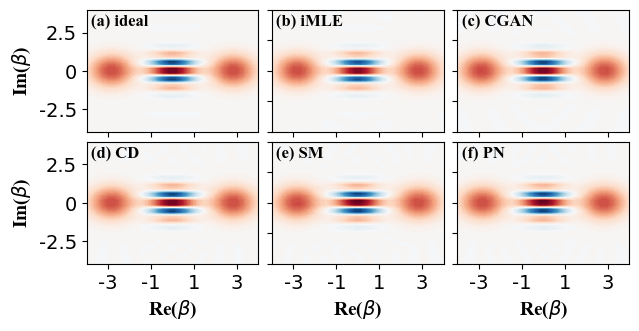

In [13]:

loaded_data = np.load('cat-special-alpha-2.npz', allow_pickle=True)

rho_ideal = loaded_data['rho_ideal']
rho_list_mle = loaded_data['rho_list_mle']
rho_list_cgan = loaded_data['rho_list_cgan']
rho_list_chol_rank = loaded_data['rho_list_chol_rank']
rho_list_mani = loaded_data['rho_list_mani']
rho_list_proj= loaded_data['rho_list_proj']


import matplotlib as mpl
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming these variables are defined elsewhere in your code
rho_list = [
    rho_ideal[0],
    rho_list_mle[0],
    rho_list_cgan[0],
    rho_list_chol_rank[0],
    rho_list_mani[0],
    rho_list_proj[0]
    
]

# List of titles for each subplot
titles = [
    '(a) ideal',
    '(b) iMLE',
    '(c) CGAN',
    '(d) CD',
    '(e) SM',
    '(f) PN'
    
]

xvec = np.linspace(-4, 4, 32)

# Create a figure with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(7, 3.3))  # Adjusted size for 6 plots

# Flatten the axes array to easily iterate over it
axs = axs.flatten()

# Initialize a variable to store the maximum value for the color normalization
max_val = -np.inf
min_val = np.inf

# First, loop over the density matrices to find the maximum and minimum values of the Wigner functions
for rho in rho_list:
    W = wigner(rho, xvec, xvec)  # Compute the Wigner function for each density matrix
    max_val = max(max_val, np.max(W))
    min_val = min(min_val, np.min(W))

# Normalize using the overall min and max values with center at 0
nrm = mpl.colors.TwoSlopeNorm(vmin=min_val, vcenter=0, vmax=max_val)

# Loop over density matrices and plot
for i, (rho, title) in enumerate(zip(rho_list, titles)):
    W = wigner(rho, xvec, xvec)  # Compute the Wigner function for each density matrix
    
    # Plot in the corresponding subplot
    c = axs[i].contourf(xvec, xvec, W, 100, cmap=cm.RdBu_r, norm=nrm)  # Use RdBu_r for reversed colormap
    
    # Add title inside the plot at the upper left corner
    axs[i].text(-3.8, 3.7, title, fontsize=12, fontname='Times New Roman', fontweight='bold', color='black', ha='left', va='top')

    # Adjust y-tick labels: Only show y-tick labels for the 1st column
    if i % 3 == 0:  # 1st column
        axs[i].tick_params(axis='y', labelsize=12)  # Make sure y-tick labels are visible
        axs[i].set_ylabel(r'Im($\beta$)', fontname='Times New Roman', fontsize=14, fontweight='bold')  # Y-axis label
        axs[i].set_yticks([-2.5, 0, 2.5])  # Custom y-ticks
        axs[i].set_yticklabels(['-2.5', '0', '2.5'], fontsize=14)  # Set y-tick labels
    else:  # Hide y-tick labels for other columns
        axs[i].set_yticklabels([])

    # Adjust x-tick labels: Only show x-tick labels for the 2nd row
    axs[i].set_xticks([-3, -1, 1, 3])  # Custom x-ticks
    if i // 3 == 1:  # 2nd row
        axs[i].set_xticklabels(['-3', '-1', '1', '3'], fontsize=14)  # Set x-tick labels
        axs[i].set_xlabel(r'Re($\beta$)', fontname='Times New Roman', fontsize=14, fontweight='bold')  # X-axis label
    else:  # Hide x-tick labels for the 1st row
        axs[i].set_xticklabels([])


# Reduce the horizontal spacing between the subplots
plt.subplots_adjust(wspace=0.08, hspace=0.08)  # Adjust wspace (horizontal space) and hspace (vertical space)

# Remove all colorbars by simply not including the colorbar setup
plt.show()

## Figure 9: GD-QST of 5-qubit states with rank varying ansatz 

/var/folders/nc/4_n3hjx92zz0xnmsg8jnvf240000gn/T/ipykernel_22608/3766160054.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cool')  # Choose a colormap


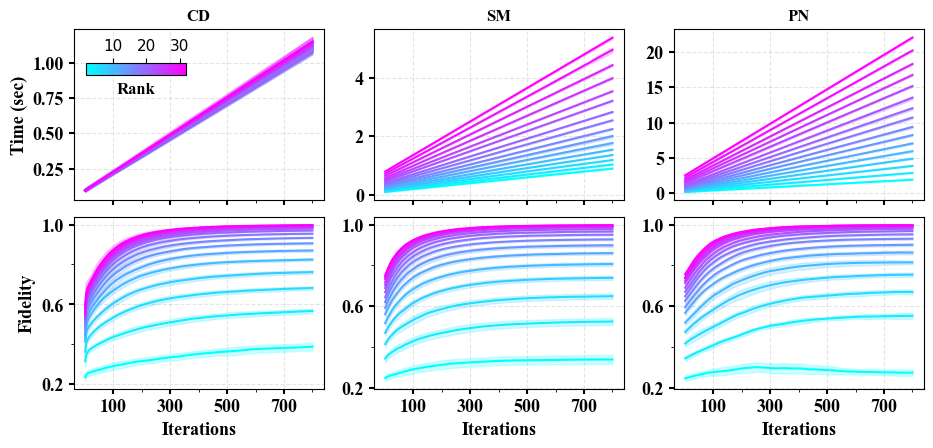

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define font properties for bold labels
bold_font = FontProperties(family='Times New Roman', weight='bold', size=13)

# List of file names and subplot titles
file_names = ['5q-rank-vary-chol.npz', '5q-rank-vary-mani.npz', '5q-rank-vary-proj.npz']
titles = ['CD', 'SM', 'PN']
ranks = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]

# Set up for 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(10, 4))

# Colormap and normalization
cmap = cm.get_cmap('cool')  # Choose a colormap
norm = Normalize(vmin=min(ranks), vmax=max(ranks))  # Normalization based on ranks
colors = [cmap(norm(rank)) for rank in ranks]

# Loop through the files and plot each dataset
for i, file_name in enumerate(file_names):
    # Load data
    loaded_data = np.load(file_name, allow_pickle=True)
    iterations = loaded_data['iterations']
    average_fid_by_rank = loaded_data['average_fid_by_rank'].item()
    average_time_by_rank = loaded_data['average_time_by_rank'].item()
    std_fid_by_rank = loaded_data['std_fid_by_rank'].item()
    std_time_by_rank = loaded_data['std_time_by_rank'].item()
    
    # Select the axes for the current file
    ax_time = axs[0, i]  # Time plots in the first row
    ax_fid = axs[1, i]   # Fidelity plots in the second row
    
    # Plot time with shaded error for ax_time
    for rank, color in zip(ranks, colors):
        avg_time = average_time_by_rank.get(rank, [])
        std_time = std_time_by_rank.get(rank, [])
        ax_time.plot(iterations, avg_time, color=color)
        ax_time.fill_between(iterations, avg_time - std_time, avg_time + std_time, alpha=0.2, color=color)

    # Set labels and formatting for time subplot
    ax_time.set_title(titles[i], fontsize=12, fontweight='bold', fontname='Times New Roman')  # Add title to each subplot
    if i == 0:  # Only add y-label for the first column
        ax_time.set_ylabel('Time (sec)', fontsize=13, fontweight='bold', fontname='Times New Roman')
    ax_time.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)
    # ax_time.set_xscale('log')
    # ax_time.set_yscale('log')
    for label in ax_time.get_xticklabels() + ax_time.get_yticklabels():
        label.set_fontproperties(bold_font)
    ax_time.grid(True, linestyle='--', color='gray', alpha=0.2)


    # Add a compact legend inside the first time plot (Cholesky)
    if i == 0:
        # Create inset axes for the legend
        cax = ax_time.inset_axes([0.05, 0.73, 0.4, 0.07])  # [x0, y0, width, height] in axes coordinates
        sm = cm.ScalarMappable(cmap=cmap, norm=norm)  # Use ScalarMappable for color consistency
        cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
        
        # Set the label and formatting for the colorbar legend
        cbar.set_label('Rank', labelpad=5, rotation=0, fontsize=12, fontweight='bold', fontname='Times New Roman')
        cbar.ax.tick_params(labelsize=11, axis='x')  # Adjust tick size
        cbar.ax.xaxis.set_ticks_position('top')  # Position ticks at the top

    # Plot fidelity with shaded error for ax_fid
    for rank, color in zip(ranks, colors):
        avg_fid = average_fid_by_rank.get(rank, [])
        std_fid = std_fid_by_rank.get(rank, [])
        ax_fid.plot(iterations, avg_fid, color=color)
        ax_fid.fill_between(iterations, avg_fid - std_fid, avg_fid + std_fid, alpha=0.2, color=color)

    # Set labels and formatting for fidelity subplot
    if i == 0:  # Only add y-label for the first column
        ax_fid.set_ylabel('Fidelity', fontsize=13, fontweight='bold', fontname='Times New Roman')
    
    # Set x-axis label for the second row plots
    ax_fid.set_xlabel('Iterations', fontsize=13, fontweight='bold', fontname='Times New Roman')

    ax_fid.set_xticks(np.arange(100, 801, 200))
    ax_fid.set_xticks(np.arange(100, 801, 100), minor=True)

    # Set same x-ticks for ax_time
    ax_time.set_xticks(np.arange(100, 801, 200))
    ax_time.set_xticks(np.arange(100, 801, 100), minor=True)

    # Remove x-tick labels on ax_time
    ax_time.set_xticklabels([])

    ax_fid.set_yticks([0.2, 0.6, 1.0])
    ax_fid.set_yticks([0.4, 0.8], minor=True)
    ax_fid.tick_params(axis='both', labelsize=11, labelcolor='black', width=1.5)
    # ax_fid.set_xscale('log')
    for label in ax_fid.get_xticklabels() + ax_fid.get_yticklabels():
        label.set_fontproperties(bold_font)
    ax_fid.grid(True, linestyle='--', color='gray', alpha=0.2)

  
# Adjust subplot parameters before saving
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.05, hspace=0.1, wspace=0.2)

# plt.tight_layout()
plt.show()

## Figure 10: Optimizing batch size and step size 

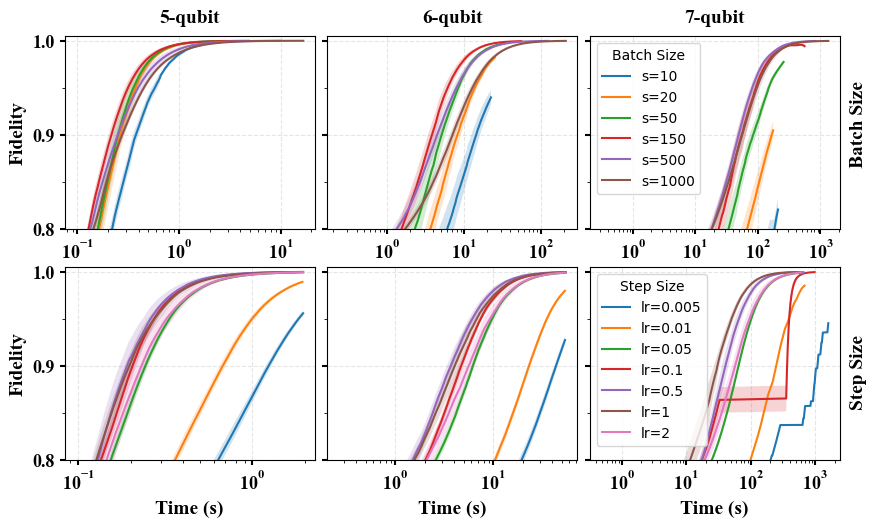

In [15]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define font properties for bold labels
bold_font = FontProperties(family='Times New Roman', weight='bold', size=13)

# Define the filenames and titles for each subplot
batch_filenames = ["BatchSize_chol_rank_5q.pkl", "BatchSize_chol_rank_6q.pkl", "BatchSize_chol_rank_7q.pkl"]
step_filenames = ["StepSize_chol_rank_5q.pkl", "StepSize_chol_rank_6q.pkl", "StepSize_chol_rank_7q.pkl"]
titles = ["5-qubit", "6-qubit", "7-qubit"]

# Create a figure with 6 subplots arranged in 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(10, 5.5))

# Iterate through each file and corresponding subplot for both batch and step size data
for row, (filenames, label_prefix) in enumerate([(batch_filenames, "Batch Size"), (step_filenames, "Step Size")]):
    for idx, (filename, title) in enumerate(zip(filenames, titles)):
        with open(filename, "rb") as f:
            Results = pickle.load(f)

        # Get batch sizes or step sizes and data for plotting
        sizes = Results["batch_s"] if row == 0 else Results["step_size"]

        # Plot each dataset for each size
        for i, size in enumerate(sizes):
            mean_time = Results["mean_time"][i]
            mean_fidelity = Results["mean_fidelity"][i]
            std_fidelity = Results["std_fidelity"][i]

            # Use 's=' for batch size and 'lr=' for step size
            label = f"s={size}" if row == 0 else f"lr={size}"

            # Plot mean fidelity
            axs[row, idx].plot(
                mean_time, 
                mean_fidelity, 
                label=label  # Updated label
            )
            
            # Plot shaded area for standard deviation
            axs[row, idx].fill_between(
                mean_time, 
                mean_fidelity - std_fidelity, 
                mean_fidelity + std_fidelity, 
                alpha=0.2  # Adjust alpha for transparency
            )

        # Set x-axis to log scale and limit y-axis
        axs[row, idx].set_yticks([0.7, 0.8, 0.9, 1.0])
        axs[row, idx].set_yticks([0.75, 0.85, 0.95], minor=True)
        axs[row, idx].set_ylim(0.8, 1.005)

        axs[row, idx].tick_params(axis='both', labelsize=13, labelcolor='black', width=1.5)
        axs[row, idx].set_xscale('log')
        for label in axs[row, idx].get_xticklabels() + axs[row, idx].get_yticklabels():
            label.set_fontproperties(bold_font)
        axs[row, idx].grid(True, linestyle='--', color='gray', alpha=0.2)

        # Set labels, title, and grid for each subplot
        if row == 1:  # Only set x-axis labels for the second row (step size plots)
            axs[row, idx].set_xlabel('Time (s)', fontsize=14, fontweight='bold', fontname='Times New Roman')
        if row == 0:  # Only set titles for the first row (batch size plots)
            axs[row, idx].set_title(f"{title}", fontsize=14, fontweight='bold', fontname='Times New Roman', pad=10)
            # axs[row, idx].tick_params(labelbottom=False)  # Remove x-tick labels for the first row

        # # Add legend only for the first subplot in the first row and second subplot in the second row
        # if (row == 0 and idx == 0) or (row == 1 and idx == 1):
        #     axs[row, idx].legend(title=label_prefix, prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 10})

        # Add legend only for the first subplot in the first row and second subplot in the second row
        if row == 0 and idx == 2:
            # axs[row, idx].legend(title=label_prefix, prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 10})
            axs[row, idx].legend(title=label_prefix)
        elif row == 1 and idx == 2:
            axs[row, idx].legend(
                title=label_prefix,
                # prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 10},
                loc='upper left'  # Position the legend at the bottom right for the step size plots
            )

        # Remove y-axis label and ticks for 2nd and 3rd plots in each row
        if idx > 0:
            axs[row, idx].set_ylabel("")
            axs[row, idx].tick_params(labelleft=False)

# Set y-axis label only for the first subplot in each row
axs[0, 0].set_ylabel('Fidelity', fontsize=14, fontweight='bold', fontname='Times New Roman')
axs[1, 0].set_ylabel('Fidelity', fontsize=14, fontweight='bold', fontname='Times New Roman')

# Add vertical labels on the right side for "Batch Size" and "Step Size"
fig.text(0.91, 0.72, "Batch Size", va='center', rotation='vertical', fontsize=14, fontweight='bold', fontname='Times New Roman')
fig.text(0.91, 0.27, "Step Size", va='center', rotation='vertical', fontsize=14, fontweight='bold', fontname='Times New Roman')

# Adjust layout to decrease horizontal space between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.2)  # Adjust wspace and hspace as needed

# Display plot
plt.show()